# Deep Learning - Global Solution

## Projeto: Hotel booking demand
## Professor Hellynson Lana

# Importar Biblioteca

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression,f_classif

#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error
#OneHotEncoder,RobustScaler
#train_test_split

# Importar Dados

Dataset referente ao negócio de agendamento de estadias em hoteis (booking),  retirado do site https://www.kaggle.com/jessemostipak/hotel-booking-demand.

In [2]:
df_raw = pd.read_csv("Airbnb/hotel_bookings.csv",parse_dates=['reservation_status_date'], dayfirst=True)
df = df_raw.copy()

# Tratar Dados

In [3]:
#Verificando os nomes das colunas. 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
# Analisando uma amostragem dos dados
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#Verificando os tipos de dados que o dataset foi importado, caso necessário modificar. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

# Análise Exploratória

**Qual é o tamanho da base?** \
Verificamos que o dataset possui 119390 linhas e 32 colunas

In [6]:
df.shape

(119390, 32)

**Quais são os tipos de dados existentes?** \
Temos dados do tipo string (colunas com texto, ex: "Deposit"), int(colunas com números inteiro, ex: 303) , date(colunas com data, ex: "2015-07-01"), float(colunas com texto, ex: "Deposit") and boleano (colunas com apenas 2 valores únicos 0 ou 1, tal como a coluna "is_canceled").

In [7]:
df.is_canceled.unique()

array([0, 1], dtype=int64)

**Existes dados faltantes? Quantos?** \ 

Sim. Há 4 colunas com quantidades diferentes de dados faltantes. Na coluna "Children" há 4 linhas faltatnes, na "country" 488 linhas, na "agent" 16340 linhas e na "company" 112593 linhas faltantes. 

In [8]:
df.isnull().sum().sort_values().tail(6)

arrival_date_year         0
lead_time                 0
children                  4
country                 488
agent                 16340
company              112593
dtype: int64

## Perfil de Viajantes

**Períodos do ano de maior viagem** 

O dataset apresentado possui apenas 1 ano completo (2016) e os anos de 2015 e 2017 inclompletos, sendo possível uma análise equivocada da série temporal. \
Com os dados apresentados, os dados sugerem um crescente aumento de usuários da plataforma de booking (infelizmente no ano 2017 não foi disponibilizados o ano completo de dados, porém até o mês de Agosto, foi observado uma quantidade de hospedagens semelhantes ao ano de 2016, sendo difícil descartar a possibilidade que o aplicativo/hospedagem tenha decaído nos próximos meses.)
Interessante observar que **os meses de Março, Abril, Maio, Junho, Julho, Agosto, Setembro, Outubro e Novembro** possuem quantidade próximas total de hospedagem.  


In [9]:
#Criar colunas de mês e ano para melhor segregar temporalmente
df['ano'] = df['reservation_status_date'].dt.year
df['mes'] = df['reservation_status_date'].dt.month


## Adaptação do Dataset

O output do modelo deve ser a coluna **'is_canceled'**, para verificar se a locação/reserva (booking) foi cancelada ou não.
O dataset foi segregado em dados de teste e de treino. \
O dataset teve seu output (y) segregado da tabela de dados dos viajantes(x). Para evitar que a análise saia enviesada \
Por ser um dataset onde o output possui grande afinidade com o atributo TEMPO (previsão futura), então segregamos os dados de teste e treino considerando o dado de teste um dado no passado (**teste: datas inferiores a data de 03/06/2017**) e dados de treino no "futuro" (**treino: dados posteriores a data de 03/06/2017**)


In [10]:
#Separando dataset de teste(y) e treino (x)
y = df['is_canceled']
x = df.drop(['is_canceled'], axis = 1)

#Criação de colunas dummies de países. A técnica foi utilizada para verificar se há algum tipo de relação do output com o país escolhido pelo viajante.
#A função get_dummies irá criar colunas com dados do tipo Boleano (0 ou 1) para indicar se a coluna do país foi escolhido pelo viajante. 
country = pd.get_dummies(df.country, prefix_sep='_', drop_first=True)
df = pd.concat( [df, country], axis=1)

#Exclusão de colunas que não iriam auxiliar no modelo. 
drop_columns=  ['reservation_status', 'reservation_status_date']

#dataset de treino
X_train = df[df['reservation_status_date'] < '2017-06-03']
y_train = X_train['is_canceled']

#Exclusão de colunas que não iriam auxiliar no modelo. Para a coluna 'children', os valores vazios foram preenchidos com 0.
#Assumiu-se que a ausência desta informação indicaria a ausência de crianças na estadia. 
X_train = X_train.drop(['is_canceled','reservation_status','agent','company','country'], axis = 1)
X_train.children = X_train.children.fillna(0)

#test dataset - Apenas com o 
X_test = df[df['reservation_status_date'] > '2017-06-03']
y_test = X_test['is_canceled']

#country = pd.get_dummies(X_test.country, prefix_sep='_', drop_first=True)
#X_test = pd.concat( [X_test, country], axis=1)
X_test = X_test.drop(['is_canceled','reservation_status','agent','company','country'], axis = 1)
X_test.children = X_test.children.fillna(0)

print( 'Training Min Date: {}'.format( X_train['reservation_status_date'].min() ) )
print( 'Training Max Date: {}'.format( X_train['reservation_status_date'].max() ) )

print( '\nTest Min Date: {}'.format( X_test['reservation_status_date'].min() ) )
print( 'Test Max Date: {}'.format( X_test['reservation_status_date'].max() ) )

X_test = X_test.drop(['reservation_status_date'], axis = 1)
X_train = X_train.drop(['reservation_status_date'], axis = 1) 
print("\n")

print("linhas,colunas")
print(X_train.shape)
print(X_test.shape)

Training Min Date: 2014-10-17 00:00:00
Training Max Date: 2017-06-02 00:00:00

Test Min Date: 2017-06-04 00:00:00
Test Max Date: 2017-09-14 00:00:00


linhas,colunas
(107787, 204)
(11457, 204)


## Análise Exploratória

Boxplot das colunas numéricas foram criadas para verificar se há muitos outliers e adistribuição dos dados

C:\Users\kendi\Anaconda3\envs\ML38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kendi\Anaconda3\envs\ML38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kendi\Anaconda3\envs\ML38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

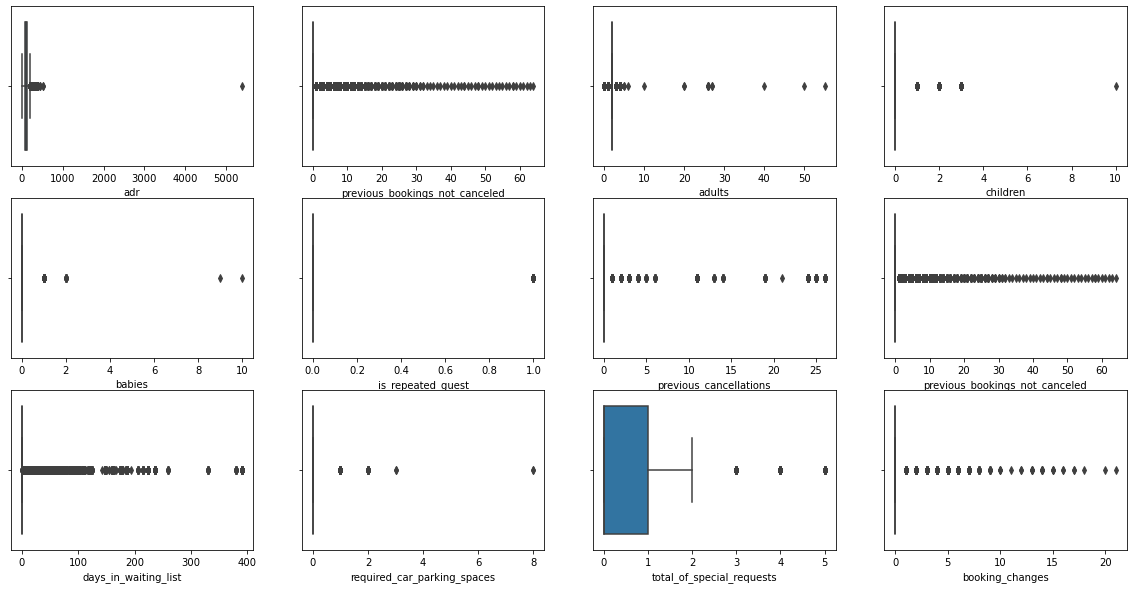

In [11]:
#Check for outliers
plt.figure(figsize=(20, 10))

plt.subplot ( 3,4,1 )
sns.boxplot(X_train['adr'])

plt.subplot ( 3,4,2 )
sns.boxplot(X_train['previous_bookings_not_canceled'])

plt.subplot ( 3,4,3 )
sns.boxplot(X_train['adults'])

plt.subplot ( 3,4,4 )
sns.boxplot(X_train['children'])

plt.subplot ( 3,4,5 )
sns.boxplot(X_train['babies'])

plt.subplot ( 3,4,6 )
sns.boxplot(X_train['is_repeated_guest'])

plt.subplot ( 3,4,7 )
sns.boxplot(X_train['previous_cancellations'])

plt.subplot ( 3,4,8 )
sns.boxplot(X_train['previous_bookings_not_canceled'])

plt.subplot ( 3,4,9 )
sns.boxplot(X_train['days_in_waiting_list'])

plt.subplot ( 3,4,10 )
sns.boxplot(X_train['required_car_parking_spaces'])

plt.subplot ( 3,4,11 )
sns.boxplot(X_train['total_of_special_requests'])

plt.subplot ( 3,4,12 )
sns.boxplot(X_train['booking_changes']);

Normalização das colunas. Foi escolhido os algoritmos de LabelEncoder para as colunas com dados categóricos (ex: hotel, deposit_type), uma vez que este método apenas troca estes valores categóricos para um valor numérico inteiro. Para as colunas com valores numéricos, utilizamos o método do MinMaxScaler, onde os valores numéricos são traduzidos "proporcionalmente" nos valores decimais entre 0 e 1.    
Os métodos foram aplicados em cada dataset de dados de treino e teste (X)

C:\Users\kendi\Anaconda3\envs\ML38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


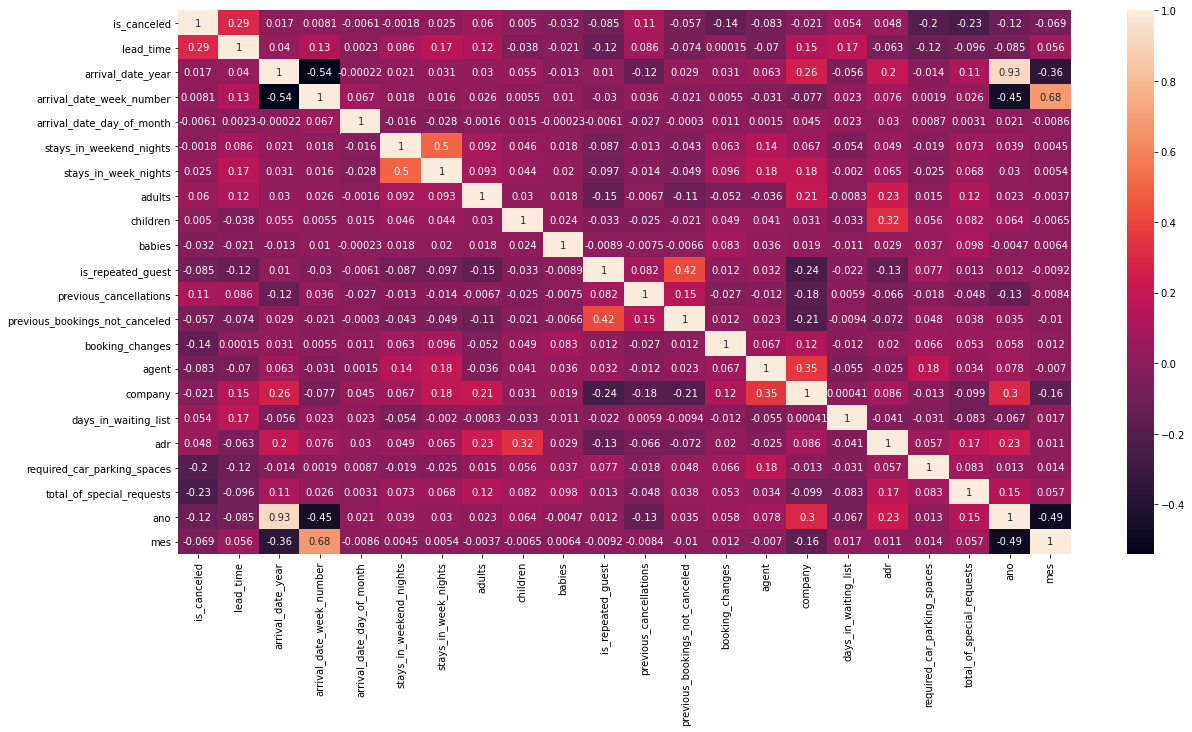

In [12]:
mms = MinMaxScaler()
le  = LabelEncoder()

#Aplicação do MinMaxScaler
X_train[['lead_time','arrival_date_year','arrival_date_day_of_month','arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies','is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled','adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'days_in_waiting_list']] = mms.fit_transform( X_train[['lead_time','arrival_date_year','arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies','is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled','adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'days_in_waiting_list','arrival_date_week_number']])

X_test[['lead_time','arrival_date_year','arrival_date_day_of_month','arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies','is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled','adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'days_in_waiting_list']] = mms.fit_transform( X_test[['lead_time','arrival_date_year','arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies','is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled','adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'days_in_waiting_list','arrival_date_week_number']])


#Aplicação do LabelEncoder

X_test[['hotel']] = le.fit_transform( X_test[['hotel']])
X_test[['arrival_date_month']] = le.fit_transform( X_test[['arrival_date_month']])
X_test[['meal']] = le.fit_transform( X_test[['meal']])
#_train[['country']] = le.fit_transform( X_train[['country']])
X_test[['market_segment']] = le.fit_transform( X_test[['market_segment']])
X_test[['distribution_channel']] = le.fit_transform( X_test[['distribution_channel']])
X_test[['reserved_room_type']] = le.fit_transform( X_test[['reserved_room_type']])
X_test[['assigned_room_type']] = le.fit_transform( X_test[['assigned_room_type']])
X_test[['deposit_type']] = le.fit_transform( X_test[['deposit_type']])
X_test[['customer_type']] = le.fit_transform( X_test[['customer_type']])


X_train[['hotel']] = le.fit_transform( X_train[['hotel']])
X_train[['arrival_date_month']] = le.fit_transform( X_train[['arrival_date_month']])
X_train[['meal']] = le.fit_transform( X_train[['meal']])
#_train[['country']] = le.fit_transform( X_train[['country']])
X_train[['market_segment']] = le.fit_transform( X_train[['market_segment']])
X_train[['distribution_channel']] = le.fit_transform( X_train[['distribution_channel']])
X_train[['reserved_room_type']] = le.fit_transform( X_train[['reserved_room_type']])
X_train[['assigned_room_type']] = le.fit_transform( X_train[['assigned_room_type']])
X_train[['deposit_type']] = le.fit_transform( X_train[['deposit_type']])
X_train[['customer_type']] = le.fit_transform( X_train[['customer_type']])

#Separar variaveis numéricas e categórigas
num_attributes = df.select_dtypes( include = ['int32', 'int64' , 'float64'] )
cat_attributes = df.select_dtypes( exclude = ['int32', 'int64' , 'float64', 'datetime64[ns]'] )

##person - categorias numericas - aplicação do heatmap para indicar as interações entre as colunas de dados. 
plt.figure(figsize=(20, 10))
correlation  =  num_attributes.corr(method = 'pearson')
sns.heatmap (correlation, annot = True);

Nesta etapa buscamos melhorar o algoritmo de clusterização (KNN) ao utilizar o modelo de seleção GridSearchCV, onde este estimador irá verificar a quantidade ótima de vizinhos para encontrar a melhor melhor quantidade de vizinhos para o algoritmo de clusterização.

## KNN

In [13]:
# Definindo a quantidade de vezes que vizinhos que deverá ser testado .
k_list = list(range(1,36))
# Colocamos os valores em um dicionário
parametros = dict(n_neighbors=k_list)

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')
grid.fit(X_train,y_train)
print("Melhores parametros {} com o valor de acurácia {} ".format(grid.best_params_,grid.best_score_))

a = pd.DataFrame(grid.cv_results_)
a.sort_values(by = 'rank_test_score', ascending= True).head()

KeyboardInterrupt: 

Com o resultado apresentado anteriormente pelo algoritmo de GridsearchCV utilizaremos o valor (30 neighbors) para processar o algoritmo do KNN no dataset de teste e o valor apresentado de precisão será utilizado como base para os demais resultados das redes neurais que criaremos a seguir. 
Podemos observar tanto pelas métricas de predição de (86.98%), quanto a métrica de área sobre a curva(0.80) 

Prediction

Predito      0    1    All
Real                      
0         9485  163   9648
1         1328  481   1809
All      10813  644  11457



Precision

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      9648
           1       0.75      0.27      0.39      1809

    accuracy                           0.87     11457
   macro avg       0.81      0.62      0.66     11457
weighted avg       0.86      0.87      0.84     11457




Precision
Precision: What proportion of positive identifications was actually correct? 
 (Note: A model that produces no false positives has a precision of 1.0.)  
 Recall: What proportion of actual positives was identified correctly? 
 (Note: A model that produces no false negatives has a recall of 1.0


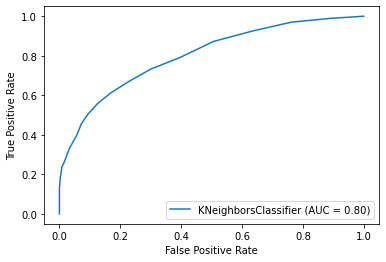

In [14]:
#Aplicando a quantidade de vizinhos encontrados pelo GridSearchCV .
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
resultado = knn.predict(X_test)


# Resultados do KNN

print ("Prediction\n")
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))
print ("\n\n\nPrecision\n")
print(metrics.classification_report(y_test,resultado))

print ("\n\n\nPrecision\nPrecision: What proportion of positive identifications was actually correct? \n (Note: A model that produces no false positives has a precision of 1.0.)  \n Recall: What proportion of actual positives was identified correctly? \n (Note: A model that produces no false negatives has a recall of 1.0")

from sklearn.metrics import plot_roc_curve
knn_disp = plot_roc_curve(knn, X_test, y_test)

O Algoritmo classificador utilizado foi o MLPClassifier, ele é tido como uma rede neural. Conduziremos o experimento com 3 redes neurais diferentes, utilizando 3 funções de ativações (relu, logistic e tahn) das camadas ocultas diferentes para poder testar/avaliar a mais promissora. 
Considerando as regras de quantidade das camadas ocultas, utilizaremos apenas uma 1 camada oculta com um tamanho entre 102 e 136 neurônios na camada. 

Nº neurônios camada oculta = (nº entrada + nº saída) / 2     
Nº neurônios camada oculta = (nº entrada) * 2/3 + (nº saída)   
Nº neurônios camada oculta < 2 * (nº entrada)   

Os demais parâmetros selecionados para o modelo são  de 
interações = 1000
\ valor min de tolerância entre as interações = 0.000001
\ função de ativação de ativação (relu, tahn e logistic)
\ tamanho das camadas escondidas (204,136,1) -> 204 neuronios de entrada (totalidade das colunas/features), 136 neurônios escondidos e 1 neurônio de saída

## MLPClassifier

In [15]:
# Avaliando a quantidade de Colunas no dataset de treino
print(len(X_train.columns))

#Calculo de quantidade de neurônios a serem utilizados no modelo neural.
print((204+1)/2)
print((204/3)*2)

#utilizaremos 136 neurônios para processar os teste

204
102.5
136.0


In [16]:
redeneural1 = MLPClassifier (verbose   = True,
                           max_iter  = 1000,
                           tol        = 0.000001,
                           activation = 'relu',
                           hidden_layer_sizes = (204,136,1),
                           learning_rate_init = 0.0001,
                           random_state= 0)
redeneural1.fit(X_train, y_train)

Iteration 1, loss = 0.68600171
Iteration 2, loss = 0.68225358
Iteration 3, loss = 0.67923001
Iteration 4, loss = 0.67680809
Iteration 5, loss = 0.67490478
Iteration 6, loss = 0.67343983
Iteration 7, loss = 0.67234384
Iteration 8, loss = 0.67156193
Iteration 9, loss = 0.67103071
Iteration 10, loss = 0.67068767
Iteration 11, loss = 0.67047690
Iteration 12, loss = 0.67035289
Iteration 13, loss = 0.67028729
Iteration 14, loss = 0.67025359
Iteration 15, loss = 0.67023612
Iteration 16, loss = 0.67022844
Iteration 17, loss = 0.67022374
Iteration 18, loss = 0.67022235
Iteration 19, loss = 0.67022128
Iteration 20, loss = 0.67022079
Iteration 21, loss = 0.67022063
Iteration 22, loss = 0.67022062
Iteration 23, loss = 0.67022089
Iteration 24, loss = 0.67022004
Iteration 25, loss = 0.67022019
Iteration 26, loss = 0.67022080
Iteration 27, loss = 0.67022059
Iteration 28, loss = 0.67022069
Iteration 29, loss = 0.67022061
Iteration 30, loss = 0.67022060
Training loss did not improve more than tol=0.000

MLPClassifier(hidden_layer_sizes=(204, 136, 1), learning_rate_init=0.0001,
              max_iter=1000, random_state=0, tol=1e-06, verbose=True)

In [17]:
redeneural2 = MLPClassifier (verbose   = True,
                           max_iter  = 1000,
                           tol        = 0.000001,
                           activation = 'logistic',
                           hidden_layer_sizes = (204,136,1),
                           learning_rate_init = 0.0001,
                           random_state= 0)
redeneural2.fit(X_train, y_train)

Iteration 1, loss = 0.67043342
Iteration 2, loss = 0.67030883
Iteration 3, loss = 0.66986248
Iteration 4, loss = 0.66204338
Iteration 5, loss = 0.64951348
Iteration 6, loss = 0.63846670
Iteration 7, loss = 0.62988491
Iteration 8, loss = 0.62201829
Iteration 9, loss = 0.61522775
Iteration 10, loss = 0.60798089
Iteration 11, loss = 0.60192494
Iteration 12, loss = 0.59515193
Iteration 13, loss = 0.58976681
Iteration 14, loss = 0.58387995
Iteration 15, loss = 0.57758036
Iteration 16, loss = 0.57270304
Iteration 17, loss = 0.56723392
Iteration 18, loss = 0.56166212
Iteration 19, loss = 0.55746521
Iteration 20, loss = 0.55144156
Iteration 21, loss = 0.54682828
Iteration 22, loss = 0.54204012
Iteration 23, loss = 0.53643174
Iteration 24, loss = 0.53212423
Iteration 25, loss = 0.52698958
Iteration 26, loss = 0.52162439
Iteration 27, loss = 0.51682831
Iteration 28, loss = 0.51163260
Iteration 29, loss = 0.50626976
Iteration 30, loss = 0.49990574
Iteration 31, loss = 0.49603069
Iteration 32, los

Iteration 253, loss = 0.22724401
Iteration 254, loss = 0.22473038
Iteration 255, loss = 0.22658356
Iteration 256, loss = 0.22620693
Iteration 257, loss = 0.22481979
Iteration 258, loss = 0.22737253
Iteration 259, loss = 0.22599730
Iteration 260, loss = 0.22503956
Iteration 261, loss = 0.22774885
Iteration 262, loss = 0.22445464
Iteration 263, loss = 0.22542034
Iteration 264, loss = 0.22631548
Iteration 265, loss = 0.22359224
Iteration 266, loss = 0.22589852
Iteration 267, loss = 0.22397965
Iteration 268, loss = 0.22305401
Iteration 269, loss = 0.22440506
Iteration 270, loss = 0.22448441
Iteration 271, loss = 0.22553879
Iteration 272, loss = 0.22446147
Iteration 273, loss = 0.22170234
Iteration 274, loss = 0.22337806
Iteration 275, loss = 0.22242018
Iteration 276, loss = 0.22260553
Iteration 277, loss = 0.22473127
Iteration 278, loss = 0.22262878
Iteration 279, loss = 0.22536445
Iteration 280, loss = 0.22320246
Iteration 281, loss = 0.22240058
Iteration 282, loss = 0.22226073
Iteration 

MLPClassifier(activation='logistic', hidden_layer_sizes=(204, 136, 1),
              learning_rate_init=0.0001, max_iter=1000, random_state=0,
              tol=1e-06, verbose=True)

In [18]:
redeneural3 = MLPClassifier (verbose   = True,
                           max_iter  = 1000,
                           tol        = 0.000001,
                           activation = 'tanh',
                           hidden_layer_sizes = (204,136,1),
                           learning_rate_init = 0.0001,
                           random_state= 0)
redeneural3.fit(X_train, y_train)

Iteration 1, loss = 0.67923107
Iteration 2, loss = 0.67293484
Iteration 3, loss = 0.66105386
Iteration 4, loss = 0.61411279
Iteration 5, loss = 0.58551371
Iteration 6, loss = 0.56430394
Iteration 7, loss = 0.54696997
Iteration 8, loss = 0.52874844
Iteration 9, loss = 0.51208862
Iteration 10, loss = 0.49726419
Iteration 11, loss = 0.48254978
Iteration 12, loss = 0.46827970
Iteration 13, loss = 0.45617346
Iteration 14, loss = 0.44506383
Iteration 15, loss = 0.43153514
Iteration 16, loss = 0.42187023
Iteration 17, loss = 0.41188615
Iteration 18, loss = 0.39907911
Iteration 19, loss = 0.39336608
Iteration 20, loss = 0.38233755
Iteration 21, loss = 0.37489939
Iteration 22, loss = 0.36892574
Iteration 23, loss = 0.36295387
Iteration 24, loss = 0.35308442
Iteration 25, loss = 0.34622625
Iteration 26, loss = 0.33879497
Iteration 27, loss = 0.33311514
Iteration 28, loss = 0.32934358
Iteration 29, loss = 0.32141045
Iteration 30, loss = 0.31698422
Iteration 31, loss = 0.31599281
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(204, 136, 1),
              learning_rate_init=0.0001, max_iter=1000, random_state=0,
              tol=1e-06, verbose=True)

# Conclusão e Próximos Passos

Considerando o resultado do algoritmo KNN, apenas a rede neural utilizando a função de de ativação "logistic" e "tahn" que apresentaram um valor de perda (loss function) próximo (0.21458398 e 0.22759257, respectivamente) após 364 e 169 iterações, respectivamente. O modelo redeneural1 não apresentou resultado promissor após 30 iterações, tal como pode-se observar nos modelos "redeneural2" e "redeneural3".  

Como ponto positivo para a utilização de uma rede neural é a possibilidade de "customizar" a quantidade de ativadores, quantidade de neurônios, quantidade de camadas escondidas e ainda combinar funções ou outros algoritmos para conseguir melhorar/adequar os resultados preditivos, tornando a utilização de algoritimos de multicamadas uma ferramenta versátil. 

Como próximo passo, seria interessante refinar os parâmetros utilizados nos modelos "redeneural2" e "redeneural3" e as configurações de quantidade de neurônios nas camadas de entrada, escondida e de saída para melhorar ainda mais os modelos e finalmente sair com o modelo com melhor precisáo, com o intuito de atingir um resultado superior ao encontrado no KNN. 